# Subsetting Cloud OPeNDAP Example

#### *Author: Phoebe Sham, NASA JPL PO.DAAC*

# Summary

One of OPeNDAP's key features is it's subsetting capabilities. It is capable of subsetting by time, space and variable, and is an effective tool for those looking to reduce the amount of gridded data required for research or analysis to a specific region, time, or set of variables. As such, subsetting reduces the amount of data run and allows users to key in on areas of interest.

This example requires preliminary Cloud-OPeNDAP set up before running these examples. For instructions, see credentials.ipynb in this repository.

import netCDF4 as nc
OPENDAP_URL = "https://opendap.earthdata.nasa.gov/providers/POCLOUD/collections/ECCO%20Atmosphere%20Surface%20Temperature%2C%20Humidity%2C%20Wind%2C%20and%20Pressure%20-%20Daily%20Mean%200.5%20Degree%20(Version%204%20Release%204)/granules/ATM_SURFACE_TEMP_HUM_WIND_PRES_day_mean_2017-12-31_ECCO_V4r4_latlon_0p50deg"
ds = nc.Dataset(OPENDAP_URL, mode="r")

print(ds)

In [1]:
import netCDF4 as nc
OPENDAP_URL = "https://opendap.earthdata.nasa.gov/providers/POCLOUD/collections/ECCO%20Atmosphere%20Surface%20Temperature%2C%20Humidity%2C%20Wind%2C%20and%20Pressure%20-%20Daily%20Mean%200.5%20Degree%20(Version%204%20Release%204)/granules/ATM_SURFACE_TEMP_HUM_WIND_PRES_day_mean_2017-12-31_ECCO_V4r4_latlon_0p50deg"
ds = nc.Dataset(OPENDAP_URL, mode="r")

print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    acknowledgement: This research was carried out by the Jet Propulsion Laboratory, managed by the California Institute of Technology under a contract with the National Aeronautics and Space Administration.
    author: Ian Fenty and Ou Wang
    cdm_data_type: Grid
    comment: Fields provided on a regular lat-lon grid. They have been mapped to the regular lat-lon grid from the original ECCO lat-lon-cap 90 (llc90) native model grid.
    Conventions: CF-1.8, ACDD-1.3
    coordinates: time_bnds latitude_bnds longitude_bnds
    coordinates_comment: Note: the global 'coordinates' attribute describes auxillary coordinates.
    creator_email: ecco-group@mit.edu
    creator_institution: NASA Jet Propulsion Laboratory (JPL)
    creator_name: ECCO Consortium
    creator_type: group
    creator_url: https://ecco-group.org
    date_created: 2020-12-17T02:23:56
    date_issued: 2020-12-17T02:23:56
    dat

### Dataset Set Up
Subsetting is based on variable selection. To view the variables in the dataset, run the following command, which will output the variables' names, types, and ranges:

In [2]:
ds.variables

{'EXFatemp': <class 'netCDF4._netCDF4.Variable'>
 float32 EXFatemp(time, latitude, longitude)
     _FillValue: 9.96921e+36
     coverage_content_type: modelResult
     long_name: Atmosphere surface (2 m) air temperature 
     standard_name: air_temperature
     units: degree_K
     comment: Surface (2 m) air temperature over open water. Note: sum of ERA-Interim surface air temperature and the control adjustment from ocean state estimation.
     coordinates: time
     valid_min: 195.37054443359375
     valid_max: 312.8451232910156
     origname: EXFatemp
     fullnamepath: /EXFatemp
 unlimited dimensions: 
 current shape = (1, 360, 720)
 filling off,
 'EXFewind': <class 'netCDF4._netCDF4.Variable'>
 float32 EXFewind(time, latitude, longitude)
     _FillValue: 9.96921e+36
     coverage_content_type: modelResult
     long_name: Zonal (east-west) wind speed
     standard_name: eastward_wind
     units: m s-1
     comment: Zonal (east-west) component of ocean surface wind. Note: EXFewind is

### Install Libraries
These examples use xarray and matplot, which are helpful tools for data analysis and computation.
In your local environment, install ```xarray``` and ```matplotlib``` for the following subsetting plot functionalities.

In [3]:
import matplotlib.pyplot as plt
import xarray as xr

### Method 1: Subsetting with xarray
Subsetting begins by first accessing cloud-enabled OPeNDAP with xarray's ```open_dataset``` function. Create an xarray named ```ecco_ds```. This xarray will later be subsetted into smaller defined tiles. 

In [4]:
ecco_ds = xr.open_dataset(OPENDAP_URL)

In [5]:
print(ecco_ds)

<xarray.Dataset>
Dimensions:         (time: 1, latitude: 360, longitude: 720, nv: 2)
Coordinates:
    latitude_bnds   (latitude, nv) float32 ...
    time_bnds       (time, nv) datetime64[ns] ...
    longitude_bnds  (longitude, nv) float32 ...
  * latitude        (latitude) float32 -89.75 -89.25 -88.75 ... 89.25 89.75
  * longitude       (longitude) float32 -179.8 -179.2 -178.8 ... 179.2 179.8
  * nv              (nv) float32 0.0 1.0
  * time            (time) datetime64[ns] 2017-12-31T06:00:00
Data variables:
    EXFatemp        (time, latitude, longitude) float32 ...
    EXFewind        (time, latitude, longitude) float32 ...
    EXFwspee        (time, latitude, longitude) float32 ...
    EXFnwind        (time, latitude, longitude) float32 ...
    EXFpress        (time, latitude, longitude) float32 ...
    EXFaqh          (time, latitude, longitude) float32 ...
Attributes: (12/57)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:             

Print out the variables in the dataset:

In [6]:
ecco_ds.data_vars

Data variables:
    EXFatemp  (time, latitude, longitude) float32 ...
    EXFewind  (time, latitude, longitude) float32 ...
    EXFwspee  (time, latitude, longitude) float32 ...
    EXFnwind  (time, latitude, longitude) float32 ...
    EXFpress  (time, latitude, longitude) float32 ...
    EXFaqh    (time, latitude, longitude) float32 ...

Select one of the variables listed above. In this example, `EXFewind` is selected. 
#### Assess the variable:
View `EXFewind` in more detail and without the global attributes by running: 

In [7]:
ecco_ds['EXFwspee']

<xarray.DataArray 'EXFwspee' (time: 1, latitude: 360, longitude: 720)>
[259200 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * longitude  (longitude) float32 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
  * time       (time) datetime64[ns] 2017-12-31T06:00:00
Attributes:
    coverage_content_type:  modelResult
    long_name:              Wind speed
    standard_name:          wind_speed
    units:                  m s-1
    comment:                10-m wind speed magnitude (>= 0 ) over open water...
    valid_min:              0.27271032333374023
    valid_max:              45.87086486816406
    origname:               EXFwspee
    fullnamepath:           /EXFwspee

#### Plot the entire variable:

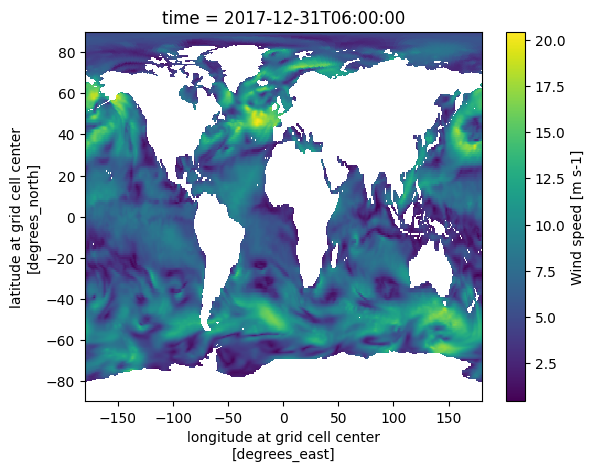

In [8]:
ecco_ds.EXFwspee.plot()

#### Subset with defined ranges:
To subset, we will use xarray's ```isel``` method. This returns a new dataset with each array indexed along the specified dimension(s). These calls extract arrays based on the provided parameters that are read as a set of coordinate indices. For more information, https://docs.xarray.dev/en/stable/generated/xarray.Dataset.isel.html.  

In this example, the following ranges are used: latitude (50,100), longitude (300,700).

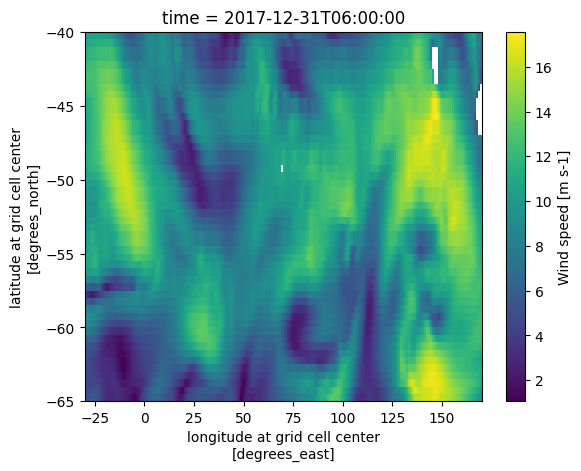

In [9]:
ecco_ds.EXFwspee.isel(latitude=slice(50,100),longitude=slice(300,700)).plot()

In [10]:
output_tile = ecco_ds.isel(latitude=300, time=0).load()
output_tile.data_vars

Data variables:
    EXFatemp  (longitude) float32 270.9 270.9 271.0 271.0 ... 270.4 270.8 270.8
    EXFewind  (longitude) float32 -7.5 -7.5 -7.743 ... -6.907 -7.207 -7.207
    EXFwspee  (longitude) float32 14.18 14.18 14.43 14.43 ... 14.37 14.16 14.16
    EXFnwind  (longitude) float32 -12.15 -12.15 -12.35 ... -12.42 -12.17 -12.17
    EXFpress  (longitude) float32 1.008e+05 1.008e+05 ... 1.009e+05 1.009e+05
    EXFaqh    (longitude) float32 0.002558 0.002558 ... 0.002547 0.002547

Use `coords` to view which coordinate values are available to use for our subset plot.

In [11]:
ecco_ds.coords

Coordinates:
    latitude_bnds   (latitude, nv) float32 ...
    time_bnds       (time, nv) datetime64[ns] ...
    longitude_bnds  (longitude, nv) float32 -180.0 -179.5 -179.5 ... 179.5 180.0
  * latitude        (latitude) float32 -89.75 -89.25 -88.75 ... 89.25 89.75
  * longitude       (longitude) float32 -179.8 -179.2 -178.8 ... 179.2 179.8
  * nv              (nv) float32 0.0 1.0
  * time            (time) datetime64[ns] 2017-12-31T06:00:00

The following plots the subsetted data with windspeed along latitude=300 over time=0 (see the output_tile definition above). 

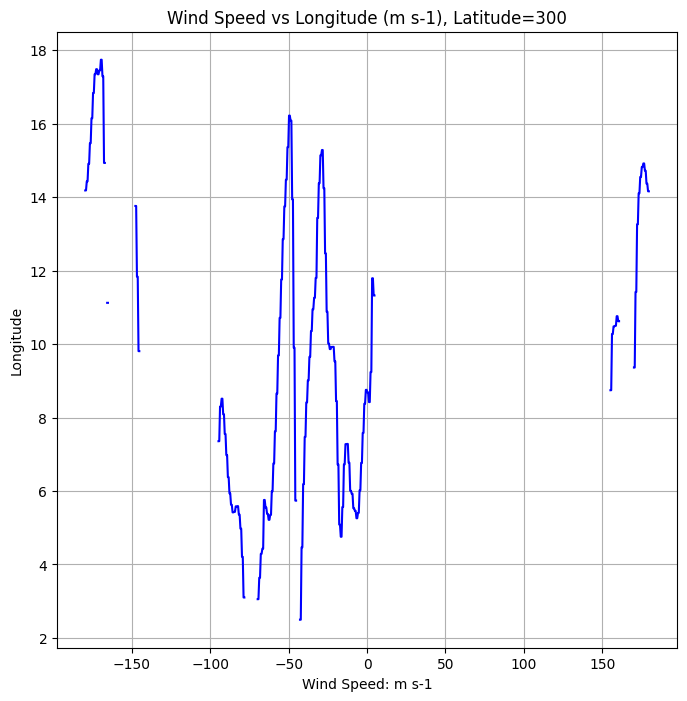

In [12]:
f, axarr = plt.subplots(1, sharex=True,figsize=(8, 8))
ax = axarr
ax.plot(ecco_ds['longitude'], output_tile.EXFwspee, color='b')
ax.set_xlabel('Wind Speed: m s-1')
ax.set_ylabel('Longitude')
ax.set_title('Wind Speed vs Longitude (m s-1), Latitude=300')
ax.grid()

## Method 2: Subsetting using the Numpy Syntax
An alternative method is to subset using Numpy's [ ] syntax on ```DataArray```.

In [13]:
ecco_ds.data_vars

Data variables:
    EXFatemp  (time, latitude, longitude) float32 ...
    EXFewind  (time, latitude, longitude) float32 ...
    EXFwspee  (time, latitude, longitude) float32 ...
    EXFnwind  (time, latitude, longitude) float32 ...
    EXFpress  (time, latitude, longitude) float32 ...
    EXFaqh    (time, latitude, longitude) float32 ...

In [14]:
wind_speed_arr = ecco_ds.EXFwspee.values
type(wind_speed_arr)
wind_speed_arr.shape

(1, 360, 720)

The shape above (1, 360, 720) aligns with the variable definition (time, latitude, longitude). To plot this using numpy, the variable has to be reduced to a 2-D array. In this example, time is removed since time is the same value for all latitude, longitude values.

In [15]:
wind_speed_2d = wind_speed_arr[0,:,:]
wind_speed_2d.shape

(360, 720)

Text(0, 0.5, 'longitude')

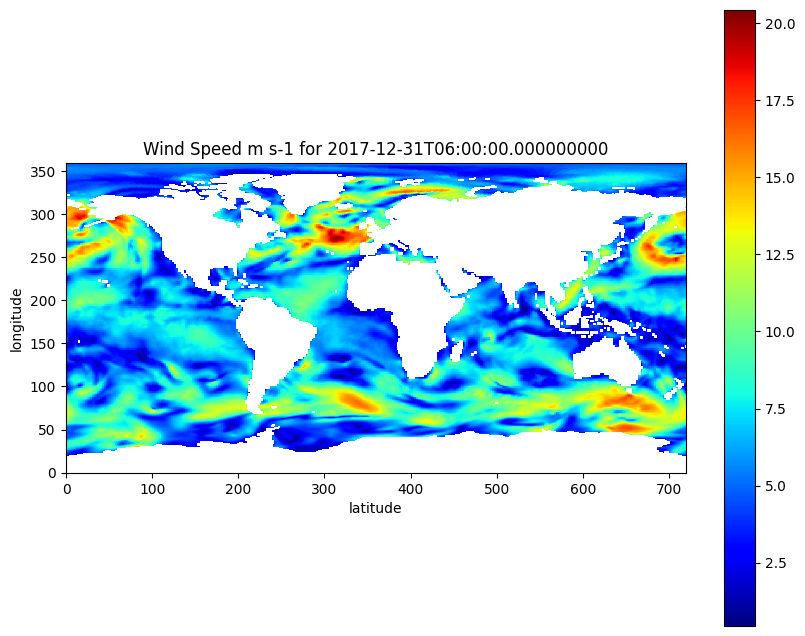

In [16]:
fig = plt.figure(figsize=(10, 8))
plt.imshow(wind_speed_2d, origin='lower',cmap='jet')
plt.colorbar()
time = ecco_ds.time.values[0]
plt.title(f'Wind Speed m s-1 for {time}')
plt.xlabel('latitude')
plt.ylabel('longitude')

To subset, create a 2D variable to plot with defined ranges. In this example, ```EXFwspee``` is subsetted with the following ranges are used: latitude (50,100), longitude (300,700).

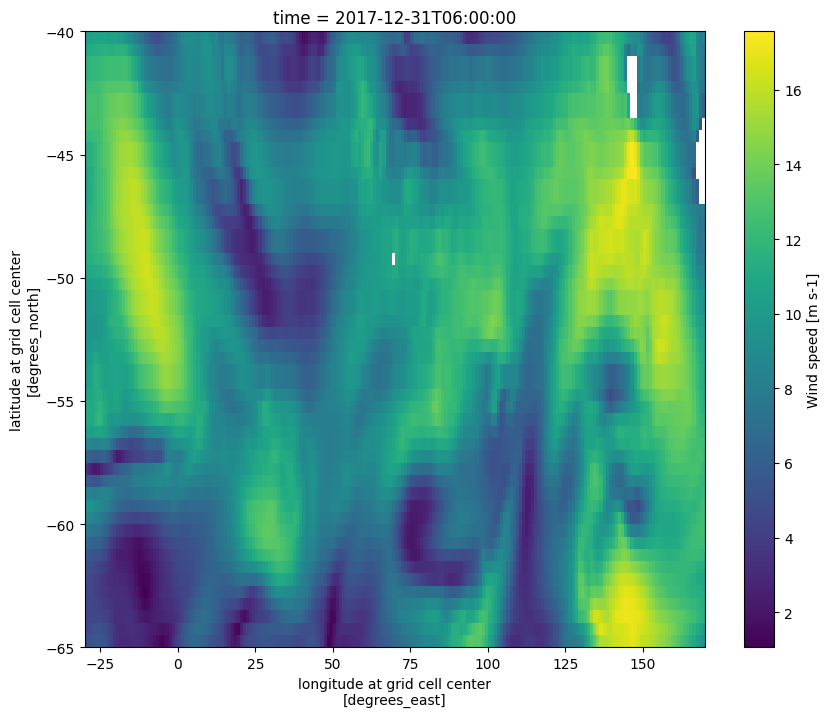

In [17]:
wind_speed_2d_subset = ecco_ds.EXFwspee[0,50:100,300:700]
fig = plt.figure(figsize=(10, 8))
wind_speed_2d_subset.plot()

In [18]:
wind_speed_1d_subset = ecco_ds.EXFwspee[0,300,:]

Trim down ```wind_speed_2_d_subset``` to a 1-D array. In this example, latitude = 300 and longitude is saved.

In [19]:
wind_speed_1d_subset.shape

(720,)

In [20]:
print(wind_speed_1d_subset)

<xarray.DataArray 'EXFwspee' (longitude: 720)>
array([14.181836, 14.181836, 14.428396, ..., 14.36692 , 14.15819 , 14.15819 ],
      dtype=float32)
Coordinates:
    latitude   float32 60.25
  * longitude  (longitude) float32 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
    time       datetime64[ns] 2017-12-31T06:00:00
Attributes:
    coverage_content_type:  modelResult
    long_name:              Wind speed
    standard_name:          wind_speed
    units:                  m s-1
    comment:                10-m wind speed magnitude (>= 0 ) over open water...
    valid_min:              0.27271032333374023
    valid_max:              45.87086486816406
    origname:               EXFwspee
    fullnamepath:           /EXFwspee


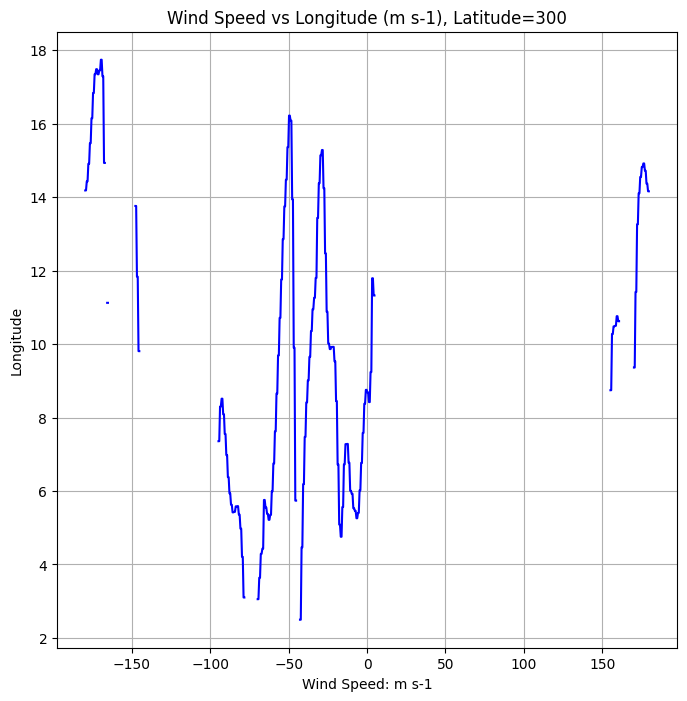

In [21]:
f, axarr = plt.subplots(1, sharex=True,figsize=(8, 8))
ax = axarr
ax.plot(ecco_ds['longitude'], wind_speed_1d_subset, color='b')
ax.set_xlabel('Wind Speed: m s-1')
ax.set_ylabel('Longitude')
ax.set_title('Wind Speed vs Longitude (m s-1), Latitude=300')
ax.grid()